# Coffee Quality Analysis ☕️

This notebook performs a basic analysis of a coffee samples dataset.  
We will use Pandas, Polars, and NumPy libraries to load and process the data.

# Emily Alvarado

In [2]:
import numpy as np
import pandas as pd
import polars as pl

# Load dataset with Pandas
df_pandas = pd.read_csv("../data/df_arabica_clean.csv")
print("Data loaded with Pandas:")
print(df_pandas.head())

Data loaded with Pandas:
   Unnamed: 0  ID Country of Origin                 Farm Name  \
0           0   0          Colombia          Finca El Paraiso   
1           1   1            Taiwan  Royal Bean Geisha Estate   
2           2   2              Laos        OKLAO coffee farms   
3           3   3        Costa Rica                 La Cumbre   
4           4   4          Colombia           Finca Santuario   

                                Lot Number                           Mill  \
0                               CQU2022015               Finca El Paraiso   
1  The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2  The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                               CQU2022017        La Montana Tarrazu MIll   
4                               CQU2023002                Finca Santuario   

  ICO Number                   Company   Altitude                Region  ...  \
0        NaN      Coffee Quality Union  1

In [3]:
# Basic exploration of the dataset
print("Dataset shape (rows, columns):", df_pandas.shape)

print("\nData types of each column:")
print(df_pandas.dtypes)

print("\nCheck for missing values:")
print(df_pandas.isnull().sum())

print("\nSummary statistics for numeric columns:")
print(df_pandas.describe())


Dataset shape (rows, columns): (207, 41)

Data types of each column:
Unnamed: 0                 int64
ID                         int64
Country of Origin         object
Farm Name                 object
Lot Number                object
Mill                      object
ICO Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number of Bags             int64
Bag Weight                object
In-Country Partner        object
Harvest Year              object
Grading Date              object
Owner                     object
Variety                   object
Status                    object
Processing Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean Cup                float64
Sweetne

In [4]:
# Ensure 'Bag Weight' is treated as string before extracting numbers
df_pandas['Bag Weight'] = df_pandas['Bag Weight'].astype(str).str.extract(r'(\d+)')
df_pandas['Bag Weight'] = pd.to_numeric(df_pandas['Bag Weight'], errors='coerce')

# Clean 'Harvest Year' - keep only the first year found
df_pandas['Harvest Year'] = df_pandas['Harvest Year'].str.extract(r'(\d{4})')
df_pandas['Harvest Year'] = pd.to_numeric(df_pandas['Harvest Year'], errors='coerce')

# Convert 'Altitude' to numeric
df_pandas['Altitude'] = pd.to_numeric(df_pandas['Altitude'], errors='coerce')

# Check missing values after cleaning
print("Missing values after cleaning:")
print(df_pandas[['Altitude', 'Bag Weight', 'Harvest Year']].isnull().sum())

# Drop only rows missing 'Altitude', since it's more important
df_pandas = df_pandas.dropna(subset=['Altitude'])

print("\nDataset shape after cleaning:", df_pandas.shape)

Missing values after cleaning:
Altitude        51
Bag Weight       0
Harvest Year     0
dtype: int64

Dataset shape after cleaning: (156, 41)


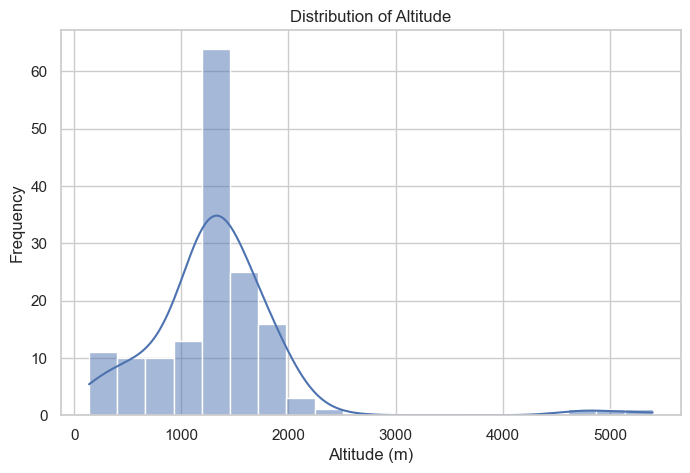

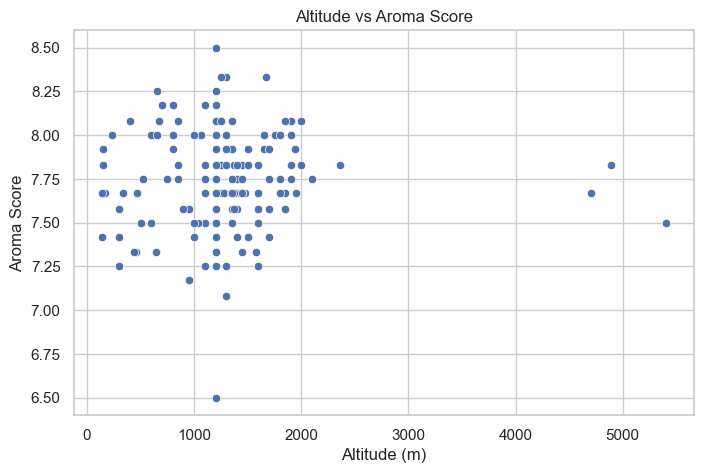

/var/folders/_p/4ny55s6n0mq7fl2w0n8hzdz80000gn/T/ipykernel_3118/2325851639.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Country of Origin", y="Flavor", data=df_pandas[df_pandas['Country of Origin'].isin(top_countries)], ci=None)


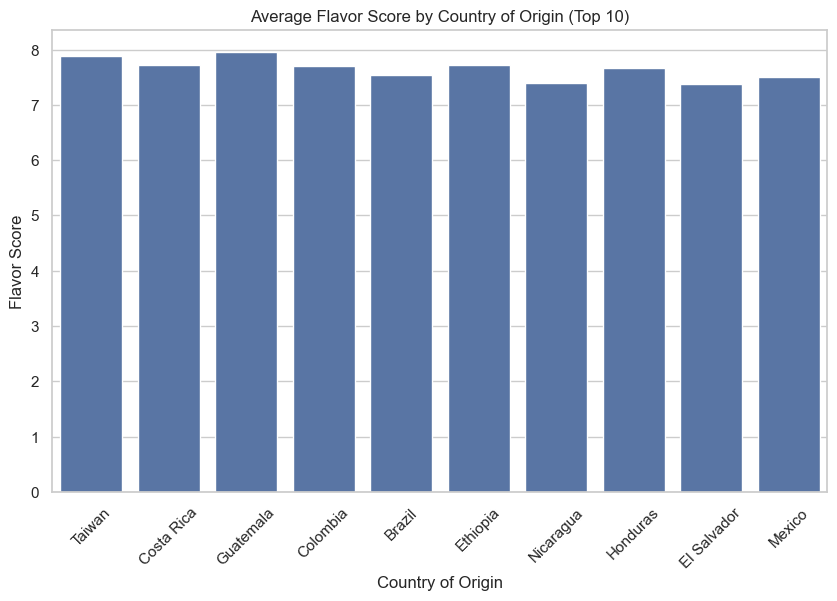

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn
sns.set(style="whitegrid")

# 1. Distribution of Altitude
plt.figure(figsize=(8,5))
sns.histplot(df_pandas['Altitude'], bins=20, kde=True)
plt.title("Distribution of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Frequency")
plt.savefig("histogram_altitude.png")
plt.show()

# 2. Relationship between Altitude and Aroma
plt.figure(figsize=(8,5))
sns.scatterplot(x="Altitude", y="Aroma", data=df_pandas)
plt.title("Altitude vs Aroma Score")
plt.xlabel("Altitude (m)")
plt.ylabel("Aroma Score")
plt.savefig("scatter_altitude_aroma.png")
plt.show()

# 3. Average Flavor score by Country of Origin (Top 10)
top_countries = df_pandas['Country of Origin'].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.barplot(x="Country of Origin", y="Flavor", data=df_pandas[df_pandas['Country of Origin'].isin(top_countries)], ci=None)
plt.xticks(rotation=45)
plt.title("Average Flavor Score by Country of Origin (Top 10)")
plt.xlabel("Country of Origin")
plt.ylabel("Flavor Score")
plt.savefig("barplot_flavor_country.png")
plt.show()